In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

print(os.listdir("./outputs_percent"))
filename = "./outputs_percent/cnn_eda_2021-11-27_19:24:51.txt"



['cnn_weda_tfidf4_2021-11-28_19:14:16.txt', 'cnn_weda_tfidf3_2021-11-28_18:50:27.txt', 'cnn_weda_tfidf1_2021-11-27_20:51:37.txt', 'cnn_weda_2021-11-27_13:50:46.txt', '.ipynb_checkpoints', 'cnn_eda_2021-11-27_19:24:51.txt', 'cnn_no_aug_2021-11-27_20:04:12.txt', 'cnn_weda_tfidf2_2021-11-27_21:10:22.txt', 'cnn_weda_tfidf0_2021-11-27_20:30:15.txt', 'cnn_no_aug_2021-11-28_19:06:32.txt']


In [12]:
def plot_file(filename):
    file = open(filename, "r")
    lines = file.readlines()

    """start = -1
    end = -1
    i = 0
    for line in lines: 
        if start == -1 and line[0] == "{":
            start = i

        if end == -1 and line[-2]=="}":
            end = i

        i+=1"""

    results = []
    value_range = []
    return_dict = {}
 
    for line in lines[5:]:
   
        name, value = line.split(":")
        #print(name, value)
        second_name, test = name.split("/")
        #value_range.append(float(test))
        #results.append(float(value))
        return_dict[name] = value

    return return_dict
    

In [13]:
def plot_folder(folder_name):
    filenames = os.listdir(folder_name)
    naug_dict = {}
    for filename in filenames:
        if filename[-4:] == '.txt':
            naug_dict[filename] = plot_file(folder_name+"/"+filename)
        
    return naug_dict

['cnn_weda_tfidf0_naug4_2021-11-30_02:40:14.txt', 'cnn_weda_tfidf0_naug8_2021-11-30_02:43:27.txt', 'cnn_weda_tfidf0_naug32_2021-11-30_03:00:24.txt', 'cnn_weda_tfidf0_naug0_2021-12-04_19:44:30.txt', 'cnn_weda_tfidf0_naug16_2021-11-30_02:50:03.txt', 'cnn_weda_tfidf0_naug1_2021-11-30_02:36:18.txt', 'cnn_weda_tfidf0_naug2_2021-11-30_02:37:59.txt']


(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

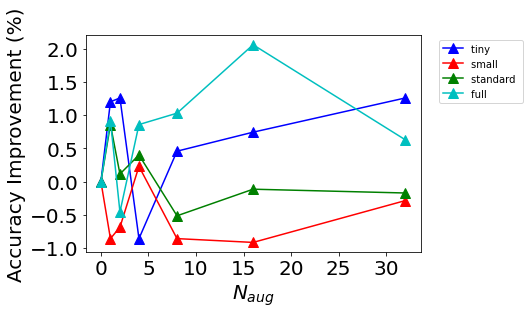

In [34]:
toplot = plot_folder("./outputs_naug")

"""
toplot = {
    filename/naug: {
        datasize: value
    }
}
"""
colrs = ['b', 'r', 'g', 'c']

print(list(toplot.keys()))
for i, datasize in enumerate(toplot[list(toplot.keys())[0]].keys()):
    naug_plot_points = []
    for naug in toplot.keys():
        naug_plot_points.append(toplot[naug][datasize])

    plt.plot([0,1,2,4,8,16,32],100*np.array(naug_plot_points, dtype = np.float32)-100*float(naug_plot_points[0]), label = datasize.split("/")[1][2:], c = colrs[i], marker = '^', markersize = 10)
    #plt.scatter([0,1,2,4,8,16,32],np.array(naug_plot_points, dtype = np.float32)-float(naug_plot_points[0]), c = colrs[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Accuracy Improvement (%)', fontdict = {'size' : 20})
plt.xlabel('$N_{aug}$', fontdict = {'size' : 20})
plt.xticks( fontsize  = 20)
plt.yticks( fontsize  = 20)



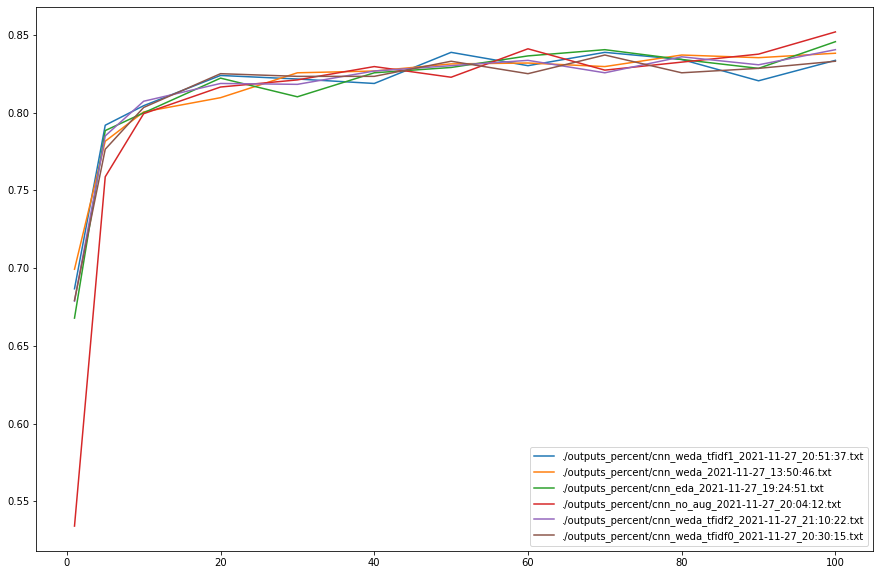

In [29]:
plt.figure(figsize=(15,10))
plot_folder("./outputs_percent")

['cnn_eda_ri_2021-11-28_21:58:35.txt', '.DS_Store', 'cnn_weda_rd_2021-11-28_23:02:35.txt', 'cnn_eda_sr_2021-11-28_20:39:03.txt', 'cnn_weda_rs_2021-11-29_00:09:07.txt', 'cnn_no_aug_2021-11-29_01:13:23.txt', 'cnn_weda_sr_2021-11-28_20:39:03.txt', 'cnn_eda_rs_2021-11-29_00:09:07.txt', 'cnn_weda_ri_2021-11-28_21:58:35.txt', 'cnn_eda_sr_2021-11-28_20:37:56.txt', 'cnn_eda_rd_2021-11-28_23:02:35.txt']


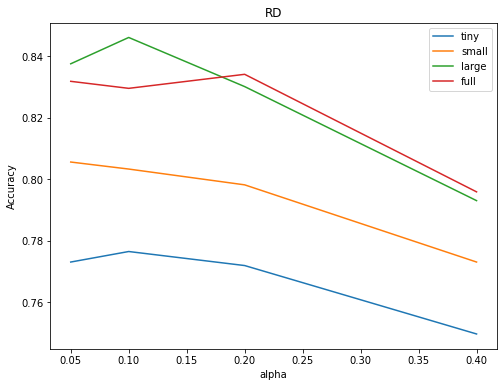

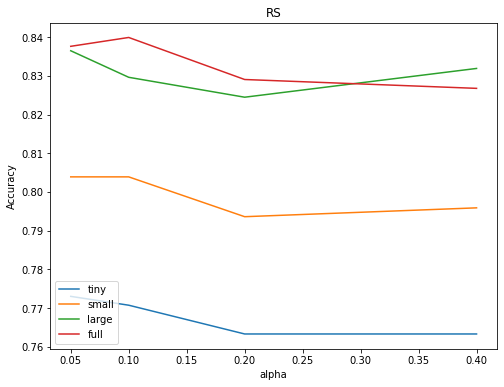

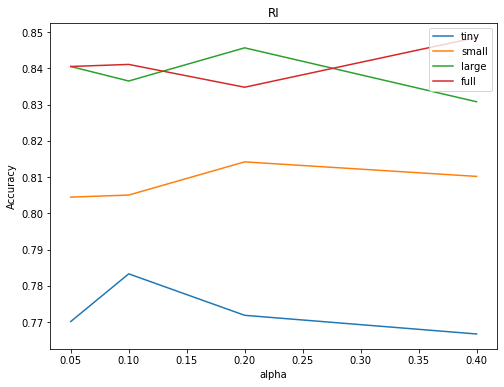

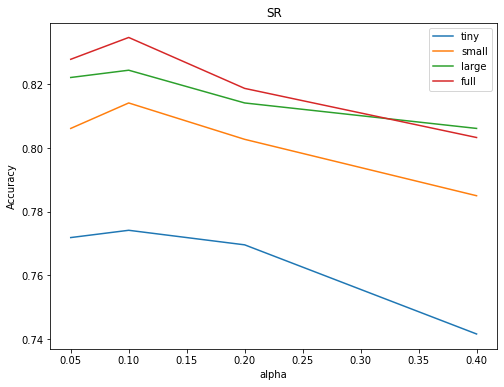

In [21]:
no_aug_filename = "cnn_no_aug_2021-11-29_01/13/23.txt"
rd_file = "cnn_weda_rd_2021-11-28_23:02:35.txt"
rs_file = "cnn_weda_rs_2021-11-29_00:09:07.txt"
ri_file = "cnn_weda_ri_2021-11-28_21:58:35.txt"
sr_file = "cnn_weda_sr_2021-11-28_20:39:03.txt"
folder_name = "./outputs_alpha_decomposed/"

print(os.listdir(folder_name))
def get_info_from_file(start, size, filename, label):
    end = start+size
    file = open(filename, "r")
    lines = file.readlines()
    value_range = []
    results = []
    
    for line in lines[start:end]:
        name, value = line.split(":")

        value_range.append(float(name))
        results.append(float(value))


    plt.plot(value_range, results, label=label)
    
def plot_alphas_decomposed():
    methods = ["RD", "RS", "RI", "SR"]
    methods_files = [rd_file, rs_file, ri_file, sr_file]
    
    for method, file in zip(methods, methods_files):
        plt.figure(figsize=(8,6)) # TODO: add in same figure
        plt.title(method)
        get_info_from_file(2, 4, folder_name+file, "tiny") # TODO: add num samples
        get_info_from_file(8, 4, folder_name+file, "small") 
        get_info_from_file(14, 4, folder_name+file, "large") 
        get_info_from_file(20, 4, folder_name+file, "full") 
        plt.legend()
        plt.xlabel("alpha")
        plt.ylabel("Accuracy")

plot_alphas_decomposed()
